# LFP and NMC Battery State of Charge (SoC) Prediction

For this project, the State of Charge (SoC) prediction for both Lithium Iron Phosphate (LFP) and Nickel Manganese Cobalt (NMC) batteries is a focal point of interest. To optimize the accuracy of these predictions, machine learning models are being trained and fine-tuned.

To facilitate this, a dataset has been sourced from the University of Maryland's Center for Advanced Life Cycle Engineering (CALCE). CALCE hosts a comprehensive collection of battery data, which is publicly accessible for research purposes at "https://calce.umd.edu/battery-data".

This dataset provides diverse and rich information about the batteries' operating conditions and performance parameters. It encompasses a wide range of charge-discharge cycles and various operating conditions, providing a rich source of data for the machine learning models to learn from.

The dataset, featuring both LFP and NMC batteries used to train a machine learning model to predict the SoC more accurately. The SoC is a crucial parameter that represents the remaining capacity of a battery as a percentage of its rated capacity. Accurate SoC estimation is critical to the effective management of battery systems, also in improving achieved c-rate's lifecycle.

In conclusion, using advanced machine learning techniques and the rich dataset provided by CALCE, the aim is to develop a robust and accurate model for predicting the SoC of LFP and NMC batteries. This endeavor will pave the way for improved battery management systems, enhancing the performance, safety, and lifespan of these batteries.

### Importing Datasets 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('soc_ai20.csv')
print(df.columns)
df.iloc[:, -4:]

Index(['Test_Time(s)', 'Current(A)', 'Voltage(V)', 'Charge_Capacity(Ah)',
       'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)',
       'dV/dt(V/s)', 'Temperature (C)_1', 'Temperature (C)_2', 'SoC'],
      dtype='object')


,dV/dt(V/s),Temperature (C)_1,Temperature (C)_2,SoC
0,0.000000,21.996674,21.184408,0.000000
1,0.000000,22.071730,21.109076,0.000463
2,-0.000062,21.996674,21.184408,0.109317
3,0.000061,22.071730,21.184408,0.214409
4,0.000062,22.071730,21.245975,0.315309
...,...,...,...,...
31783,0.000000,21.746052,20.952967,101.849072
31784,0.000000,21.913347,21.014498,101.849072
31785,0.000000,21.780369,21.089838,101.849072
31786,0.000000,21.811115,21.226692,101.849072


In [2]:
df_nmc = pd.read_csv('soc_nmc25.csv')
print(df_nmc.columns)
df_nmc.iloc[:, -4:]

Index(['Test_Time(s)', 'Current(A)', 'Voltage(V)', 'Charge_Capacity(Ah)',
       'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)',
       'dV/dt(V/s)', 'SoC'],
      dtype='object')


,Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),SoC
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000032,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
63985,0.360011,6.559094,-0.000032,87.297117
63986,0.360011,6.559192,0.000000,87.298527
63987,0.360011,6.559289,0.000000,87.299915
63988,0.360011,6.559386,-0.000032,87.301303


### Developing Random Forest Regression Model for LFP Battery

This script facilitates the prediction of the State of Charge (SoC) for Lithium Iron Phosphate (LFP) batteries, specifically the A123 Battery model. This is achieved by training a machine learning model on the provided dataset, which includes numerous parameters relevant to battery performance. The dataset, sourced from the University of Maryland's Center for Advanced Life Cycle Engineering (CALCE), is arranged in Excel than loaded into a pandas DataFrame. The SoC is considered as the target variable, while all other parameters, such as Current(A), Voltage(V), Charge_Capacity(Ah), and Temperature (C)_1, are considered as feature variables.
The data is then divided into training and testing sets, with 80% of the data used for training and the remaining 20% reserved for testing the model's predictions. The model utilized here is a Random Forest Regressor, which is a popular ensemble learning method known for its robustness and high performance in regression tasks.

The model is trained on the training dataset, and predictions are made on the testing dataset. Alongside this, SoC is also calculated using a simple voltage-based method. This calculation involves dividing each voltage value by 4.2V, considered as the maximum voltage of the battery cell. To evaluate the model's performance, metrics such as the Mean Squared Error (MSE) and the validation score are calculated. Furthermore, the Root Mean Squared Error (RMSE) between the machine learning model's predictions and the voltage-based SoC calculations is determined. This provides an indication of how well the model's predictions align with the simpler voltage-based calculations. The script also includes visualizations for better understanding the model's predictions. A scatter plot compares the actual SoC values against the model's predictions, offering a clear representation of prediction accuracy. Additionally, for each parameter in the dataset, a plot is created that demonstrates the change in the parameter value.

In essence, this script provides a comprehensive methodology for predicting the SoC of an A123 LFP battery, encompassing data processing, model training, prediction, performance evaluation, and visualization.

Mean Squared Error: 1.1467150119615344e-05
Validation Score: 0.9999999884663727
Root Mean Squared Error between ML predictions and voltage-based SoC: 0.7836344679418402


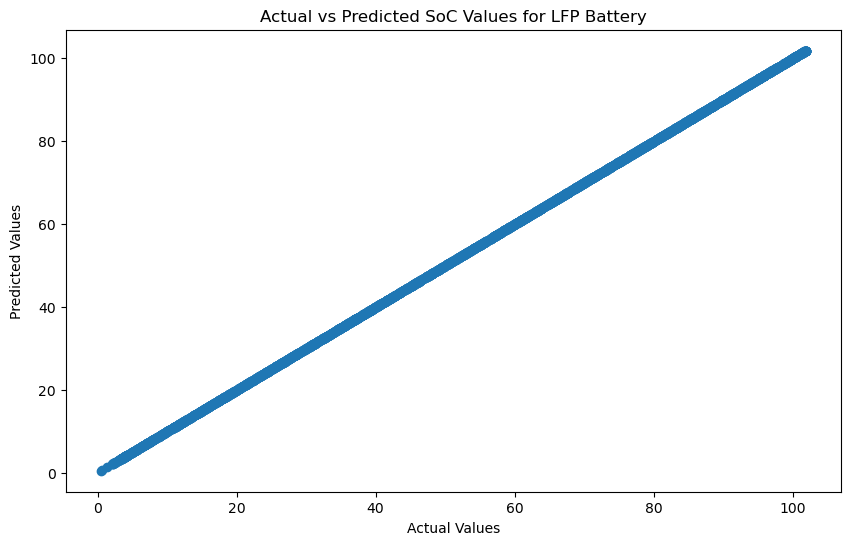

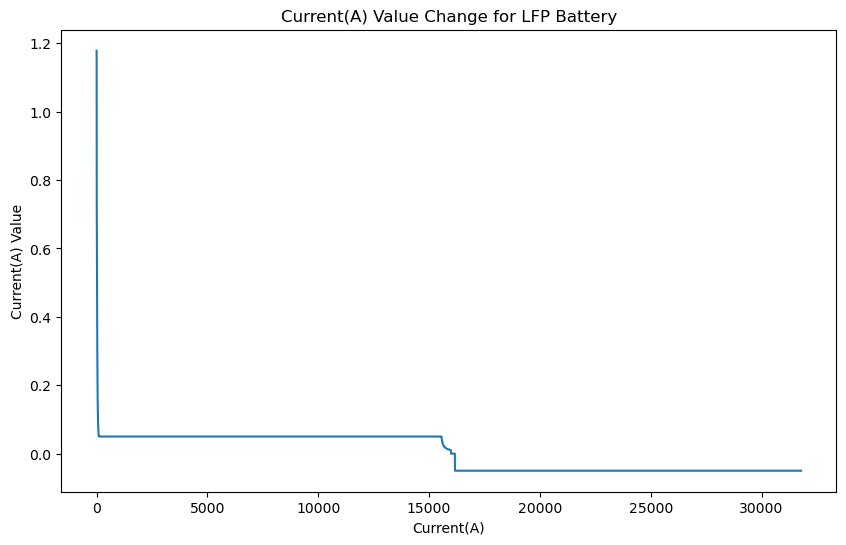

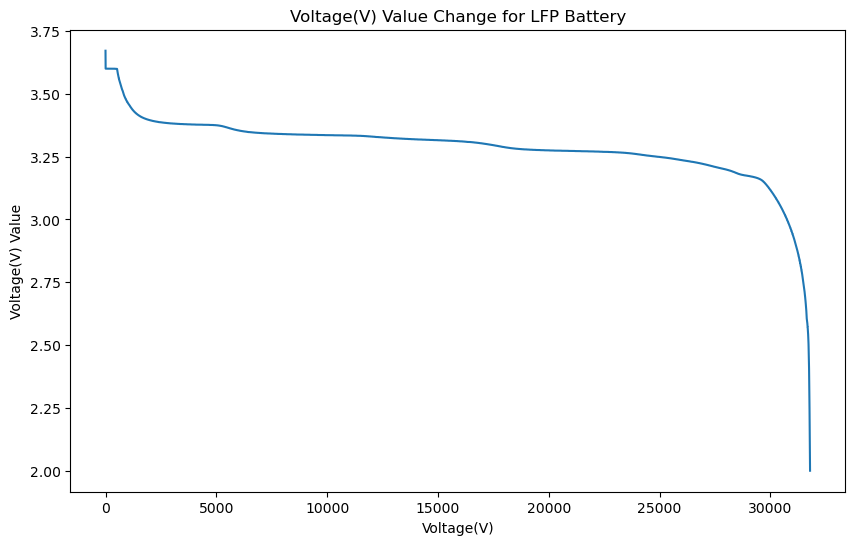

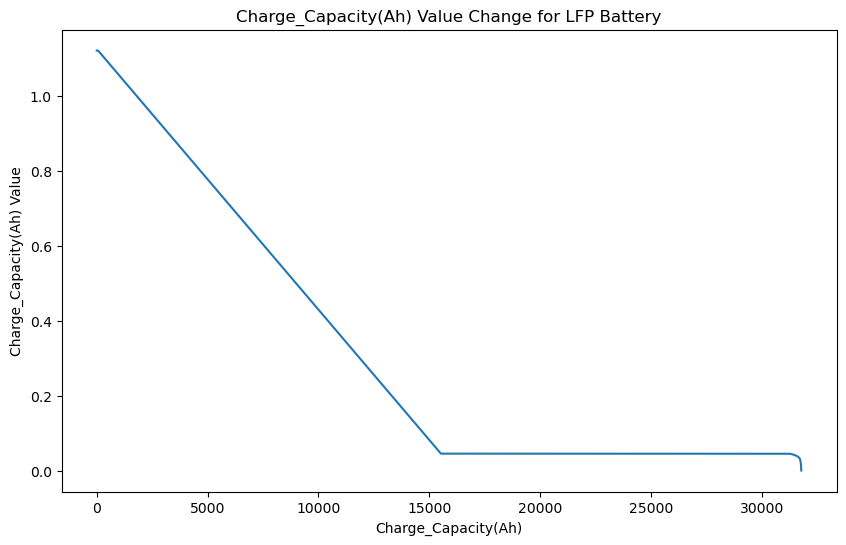

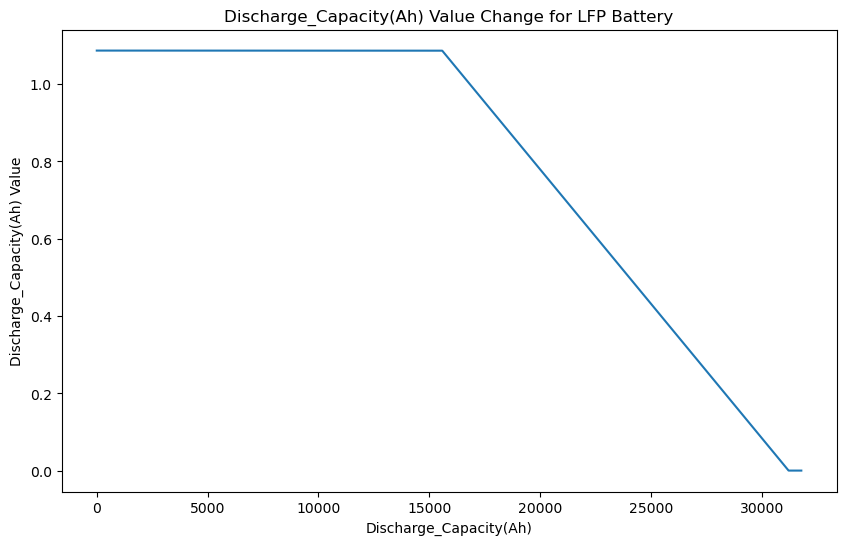

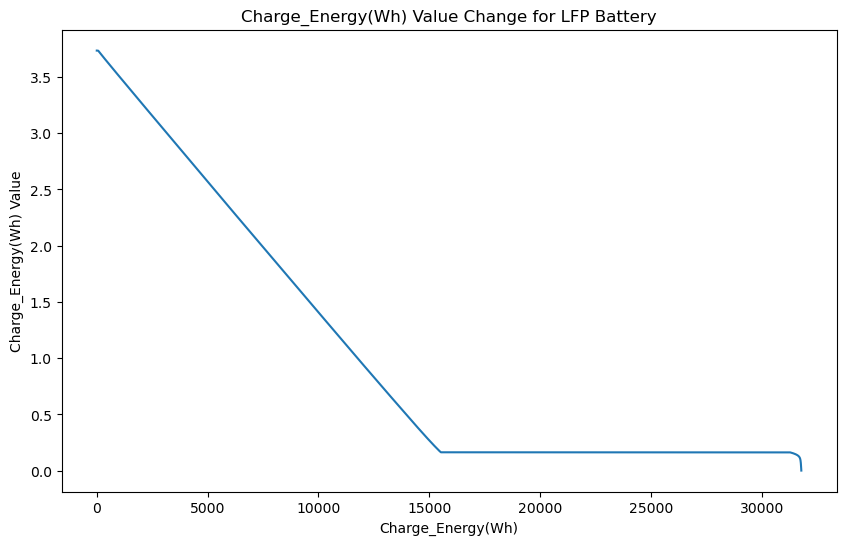

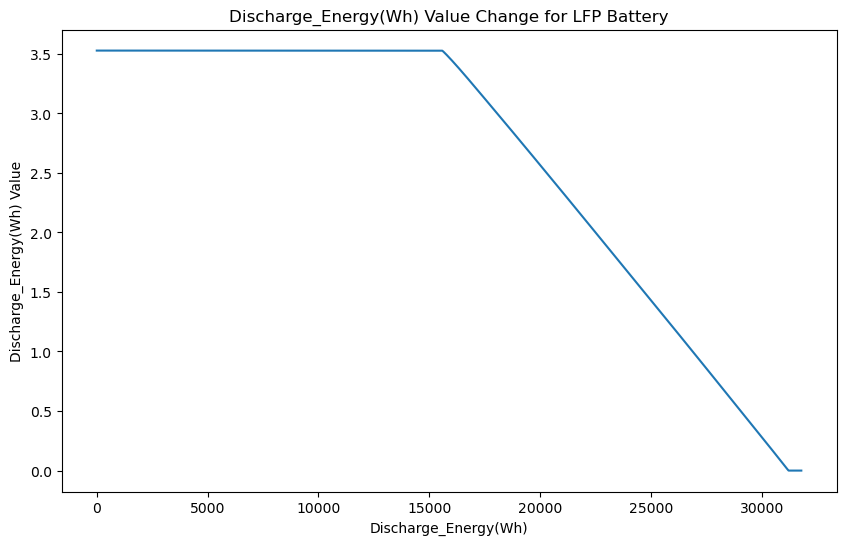

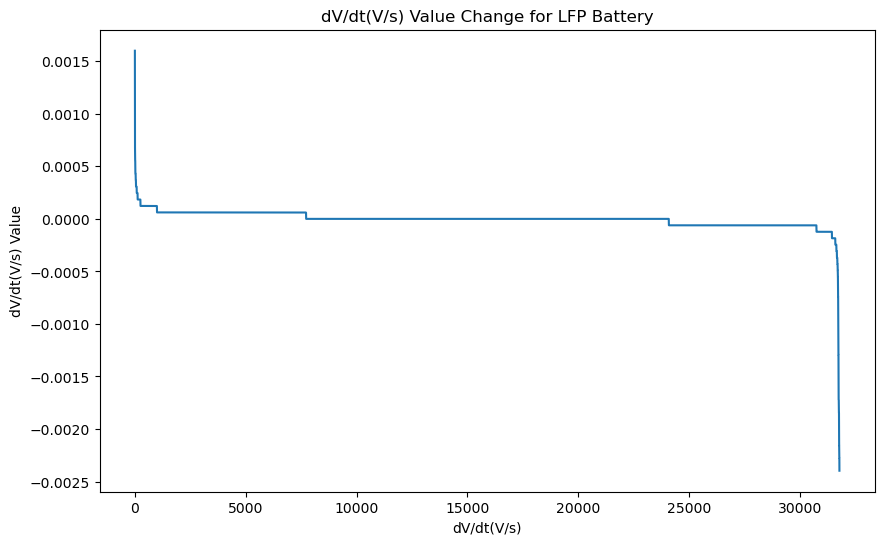

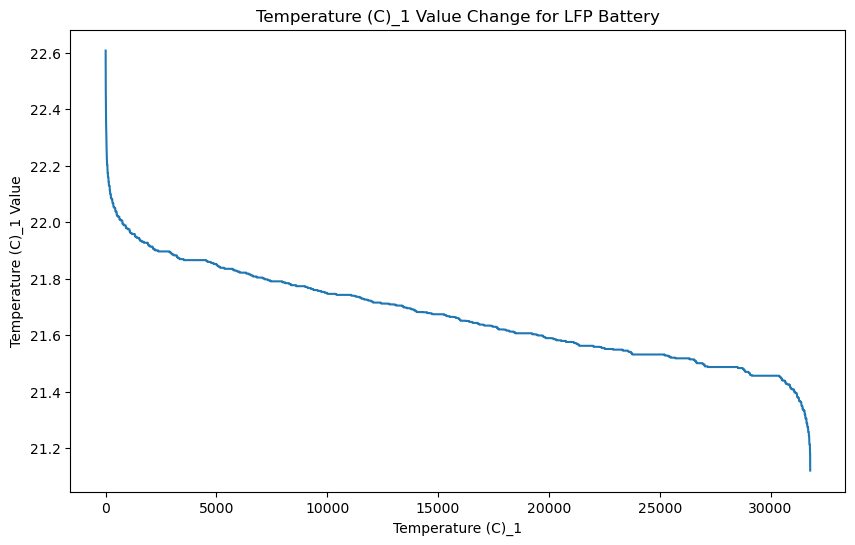

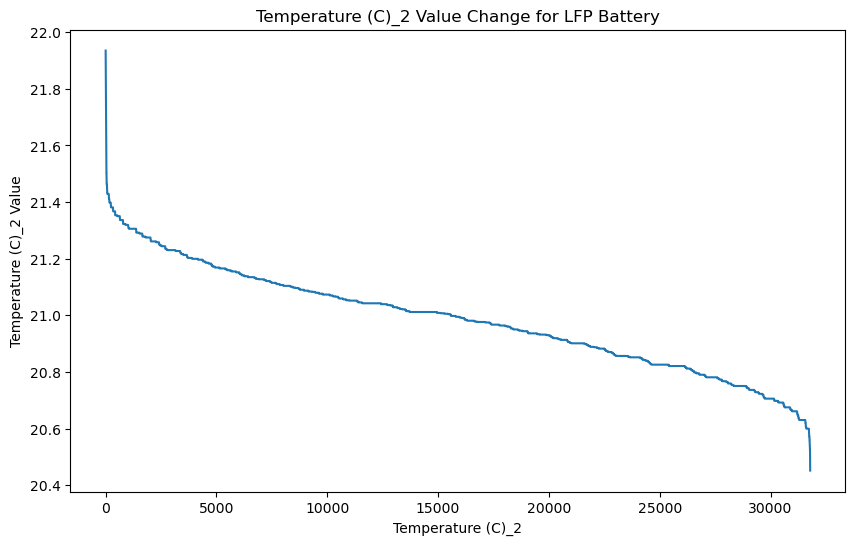

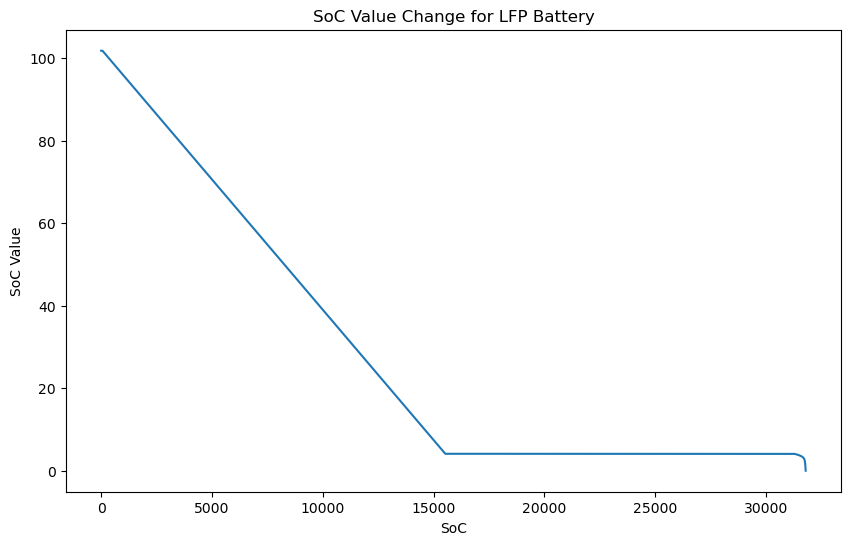

In [31]:
# LFP Battery (A123 Battery) 
# Dataset Website: https://calce.umd.edu/battery-data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('soc_ai20.csv')  

# Get feature and target data
X = df.drop(columns='SoC')  # All columns except SoC
y = df['SoC']  # SoC column

# Extract Voltage(V) column for voltage-based SoC calculation
battery_voltage = df['Voltage(V)']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, voltage_train, voltage_test = train_test_split(
    X, y, battery_voltage, test_size=0.2, random_state=42)

# Initialize a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

def calculate_voltage_soc(battery_voltage):
    """
    Calculate SoC based on voltage
    """
    soc = battery_voltage / 4.2 # 4.2 V
    return soc

# To get SoC differences for test data
soc_differences = []

for i in range(len(X_test)):
    voltage_soc = calculate_voltage_soc(voltage_test.iloc[i])
    soc_difference = abs(predictions[i] - voltage_soc)  # Absolute difference
    soc_differences.append(soc_difference)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

validation_score = model.score(X_test, y_test)
print(f"Validation Score: {validation_score}")

# Calculate RMSE between ML predictions and voltage-based SoC
rmse = np.sqrt(mean_squared_error(y_test, soc_differences))
print(f"Root Mean Squared Error between ML predictions and voltage-based SoC: {rmse}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted SoC Values for LFP Battery')
plt.show()


parameters = ['Current(A)', 'Voltage(V)', 'Charge_Capacity(Ah)',
       'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)',
       'dV/dt(V/s)', 'Temperature (C)_1', 'Temperature (C)_2', 'SoC']

# Plotting values
for param in parameters:
    sorted_df = df[param].sort_values(ascending=False).reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_df.values)
    plt.xlabel(param)
    plt.ylabel(param + ' Value')
    plt.title(param + ' Value Change for LFP Battery')
    plt.show()

### Developing Random Forest Regression Model for NMC Battery


The above script is implemented to predict the State of Charge (SoC) for the Nickel Manganese Cobalt (NMC) batteries, specifically focusing on the INR 18650-20R Battery model. A machine learning model is trained using a dataset that includes various battery performance parameters. The dataset, which is available on the website of the Center for Advanced Life Cycle Engineering (CALCE) at the University of Maryland, is arranged in Excel than loaded into a pandas DataFrame. The SoC is regarded as the target variable, while the other parameters, such as Test_Time(s), Current(A), Voltage(V), Charge_Capacity(Ah), and Discharge_Capacity(Ah), are considered feature variables. The dataset is divided into training and testing sets, with the former constituting 80% of the data and the latter 20%. The machine learning model employed in this instance is the Random Forest Regressor, renowned for its high performance and robustness in dealing with regression problems.

The model is trained using the training dataset and subsequently used to make predictions on the testing dataset. To evaluate the accuracy of the model, the Mean Squared Error (MSE) between the predicted and actual SoC values is calculated. Additionally, a validation score is calculated to quantify the model's performance on the testing dataset. The script includes visualizations to help understand the predictions. A scatter plot shows the comparison between actual SoC values and those predicted by the model, providing an understanding of the accuracy of predictions. Also, for each parameter in the dataset, a plot is produced to display the variations in parameter values.

In conclusion, this script presents a systematic approach to predict the SoC of an INR 18650-20R NMC battery. 

Mean Squared Error: 1.134957874632562e-06
Validation Score: 0.9999999982847174


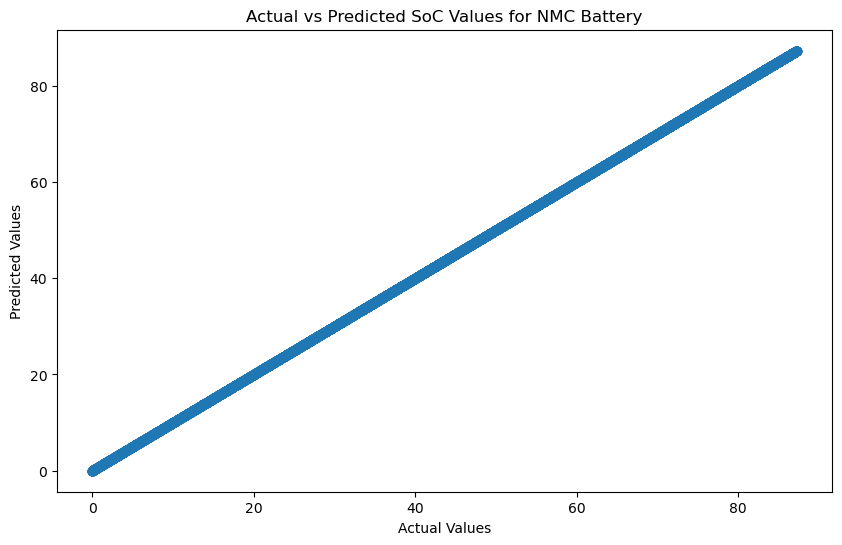

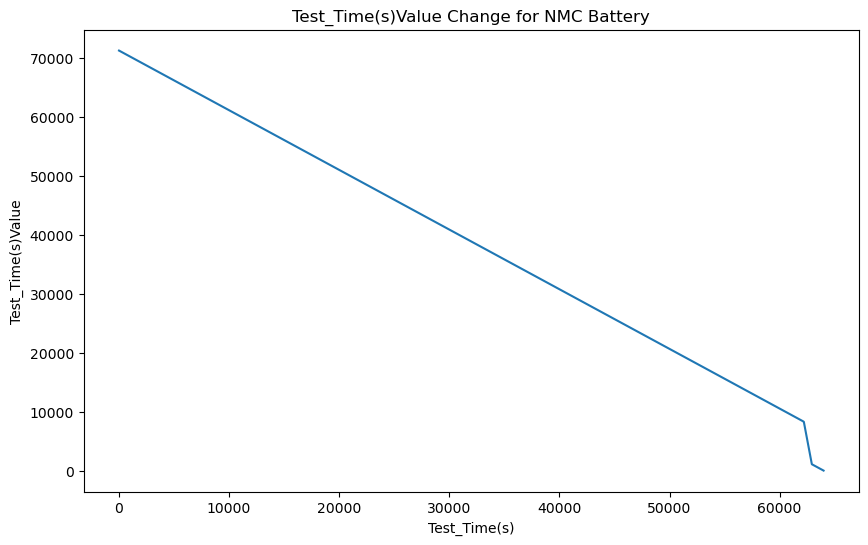

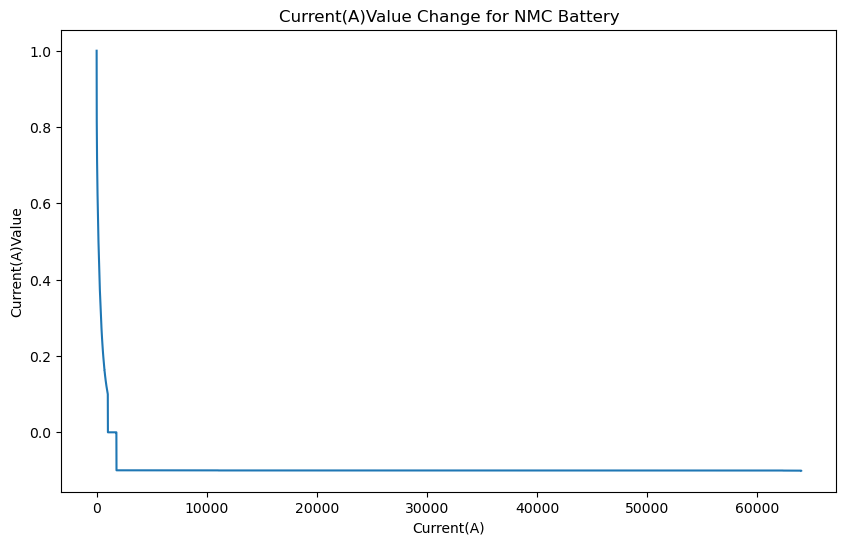

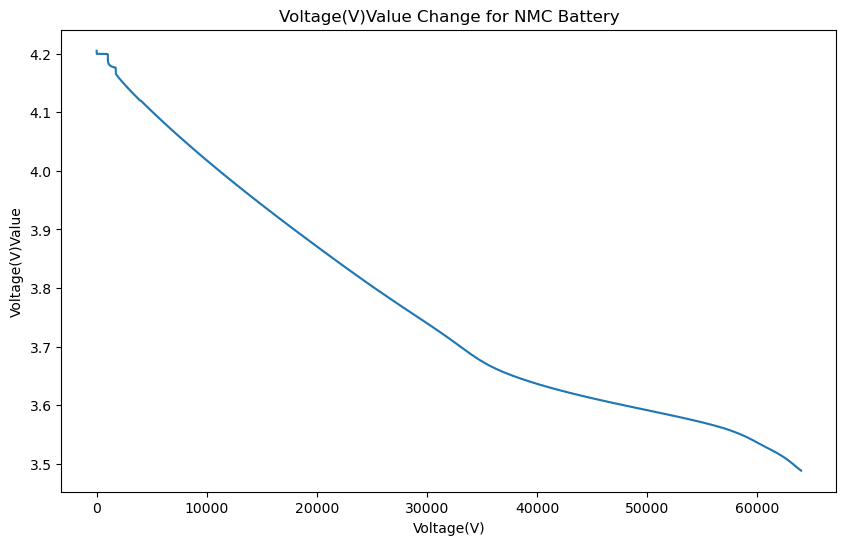

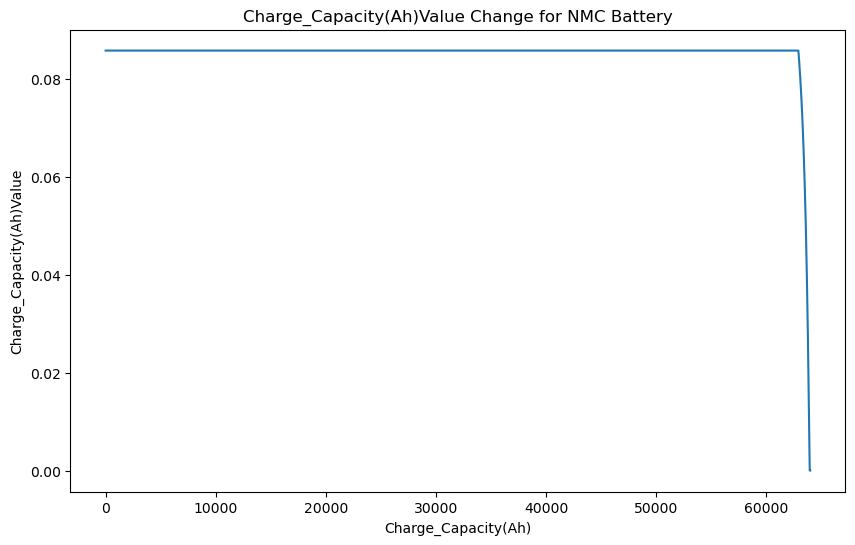

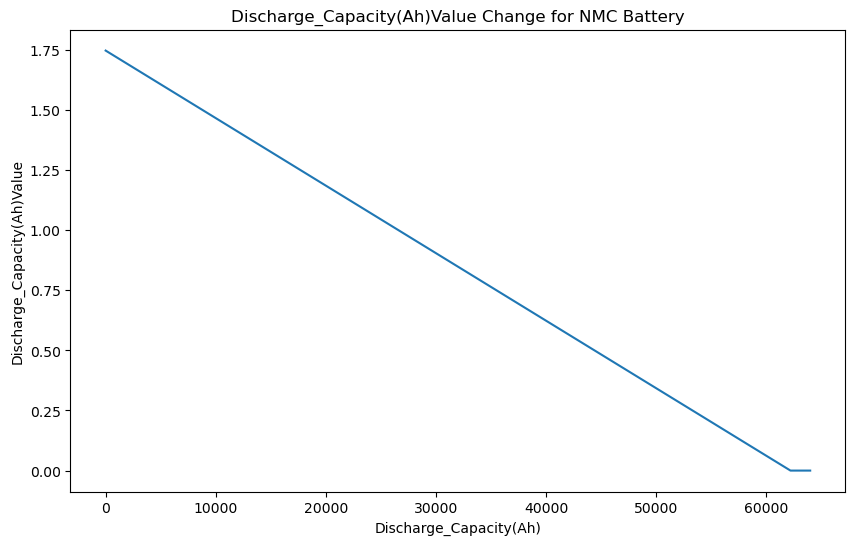

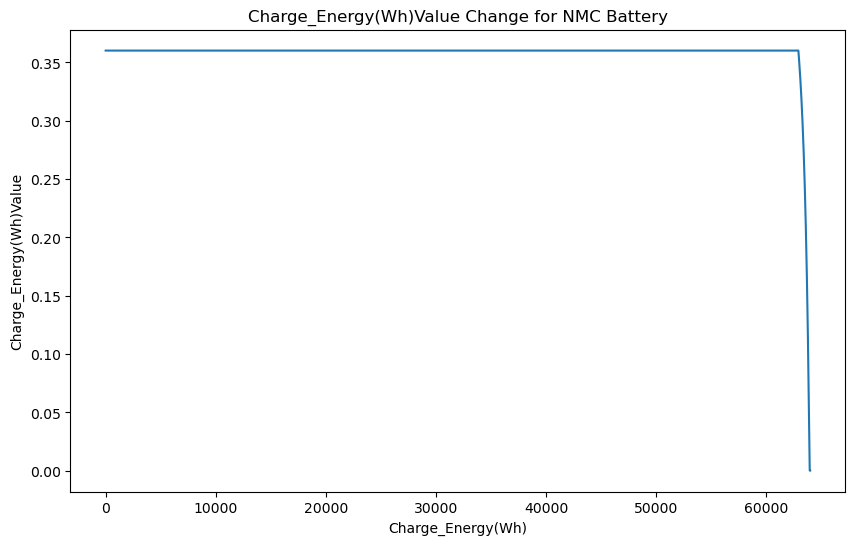

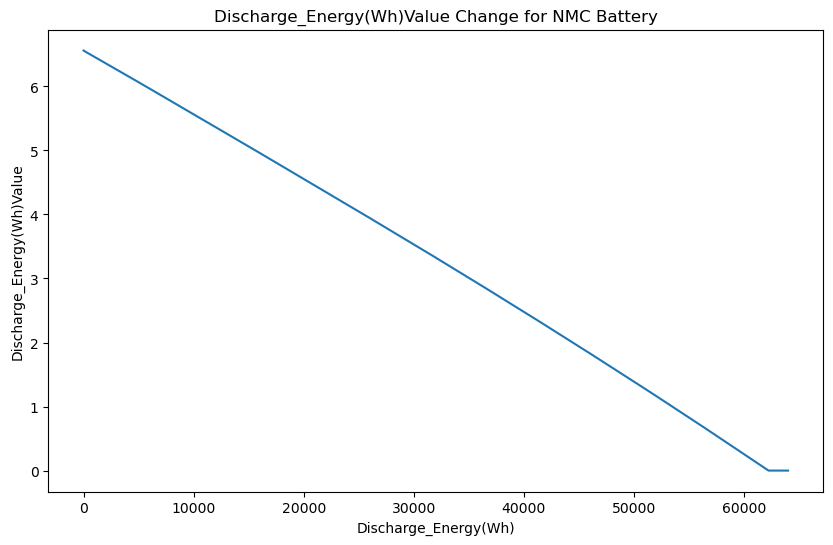

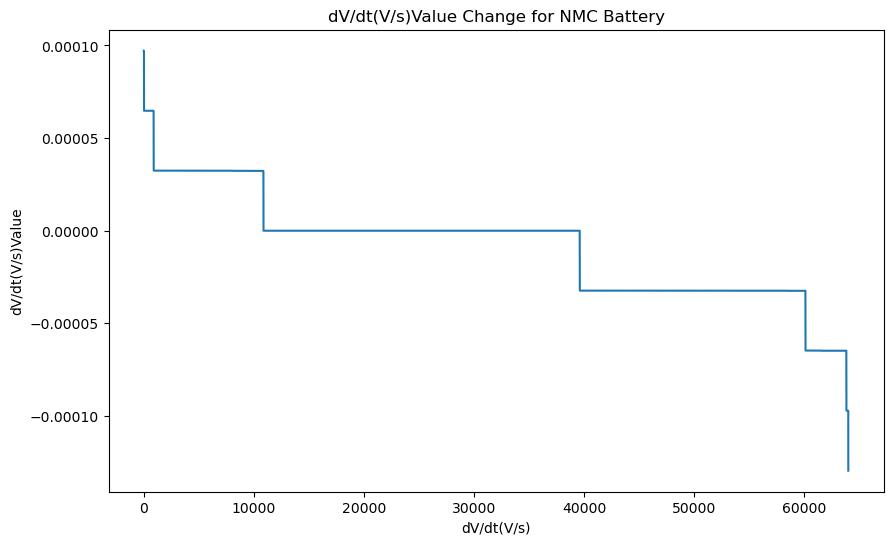

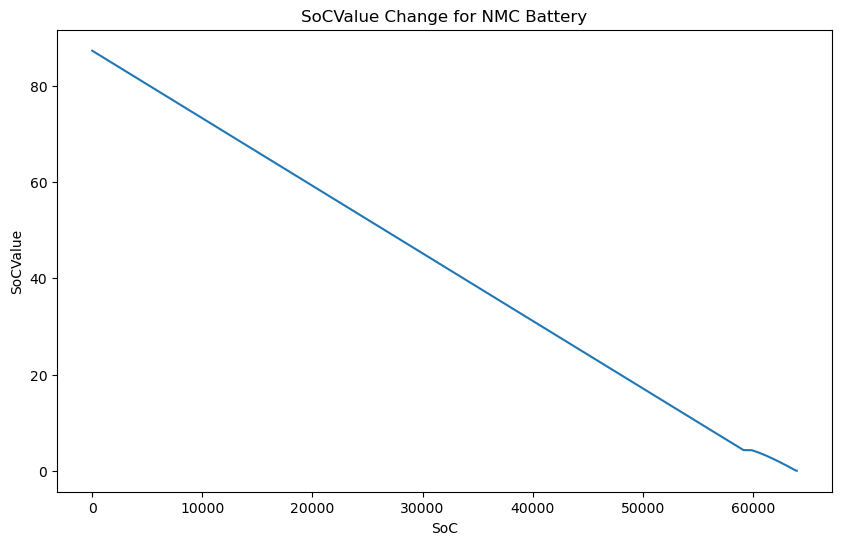

In [30]:
#NMC Battery (INR 18650-20R Battery)
#Dataset Website: https://calce.umd.edu/battery-data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv('soc_nmc25.csv')  

# Get feature and target data
X = df.drop(columns='SoC')  # All columns except SoC
y = df['SoC']  # SoC column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

validation_score = model.score(X_test, y_test)
print(f"Validation Score: {validation_score}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)

# You first assign the label and then change its color
xlbl = plt.xlabel('Actual Values')
ylbl = plt.ylabel('Predicted Values')


plt.title('Actual vs Predicted SoC Values for NMC Battery')
plt.show()

parameters = ['Test_Time(s)', 'Current(A)', 'Voltage(V)', 'Charge_Capacity(Ah)',
       'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)',
       'dV/dt(V/s)', 'SoC']

# Plotting values
for param in parameters:
    sorted_df = df[param].sort_values(ascending=False).reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_df.values)
    plt.xlabel(param)
    plt.ylabel(param + 'Value')
    plt.title(param + 'Value Change for NMC Battery')
    plt.show()